# 🏞️ Data visualization - Land data

## Load packages and data

In [26]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/clean/land-data.csv")

# Set sns theme
sns.set_theme(style="whitegrid", palette="Pastel1")
sns.set_context("paper")

## Summary of the data

In [27]:
print(df.describe())
print(df['District'].unique())

              Price  AreaAssigned   PricePerSqm
count  1.667100e+04  1.667100e+04  16671.000000
mean   2.000511e+05  3.728513e+06    180.549899
std    6.063197e+05  4.757014e+08    622.088627
min    3.000000e+02  2.000000e+00      0.000001
25%    3.599000e+04  5.300000e+02     11.708688
50%    6.600000e+04  1.600000e+03     45.304060
75%    1.400000e+05  5.200000e+03    147.435897
max    2.000000e+07  6.142007e+10  25000.000000
['Castelo Branco' 'Santarém' 'Braga' 'Lisboa' 'Vila Real' 'Aveiro' 'Faro'
 'Coimbra' 'Porto' 'Leiria' 'Viana do Castelo' 'Setúbal' 'Évora' 'Guarda'
 'Portalegre' 'Beja' 'Ilha de Santa Maria' 'Bragança' 'Ilha de São Miguel'
 'Ilha de Porto Santo' 'Viseu' 'Ilha da Madeira' 'Ilha Terceira']


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16671 entries, 0 to 16670
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         16671 non-null  float64
 1   District      16671 non-null  object 
 2   City          16671 non-null  object 
 3   AreaAssigned  16671 non-null  float64
 4   PricePerSqm   16671 non-null  float64
 5   Region        16671 non-null  object 
dtypes: float64(3), object(3)
memory usage: 781.6+ KB
None


## Number of cases per city

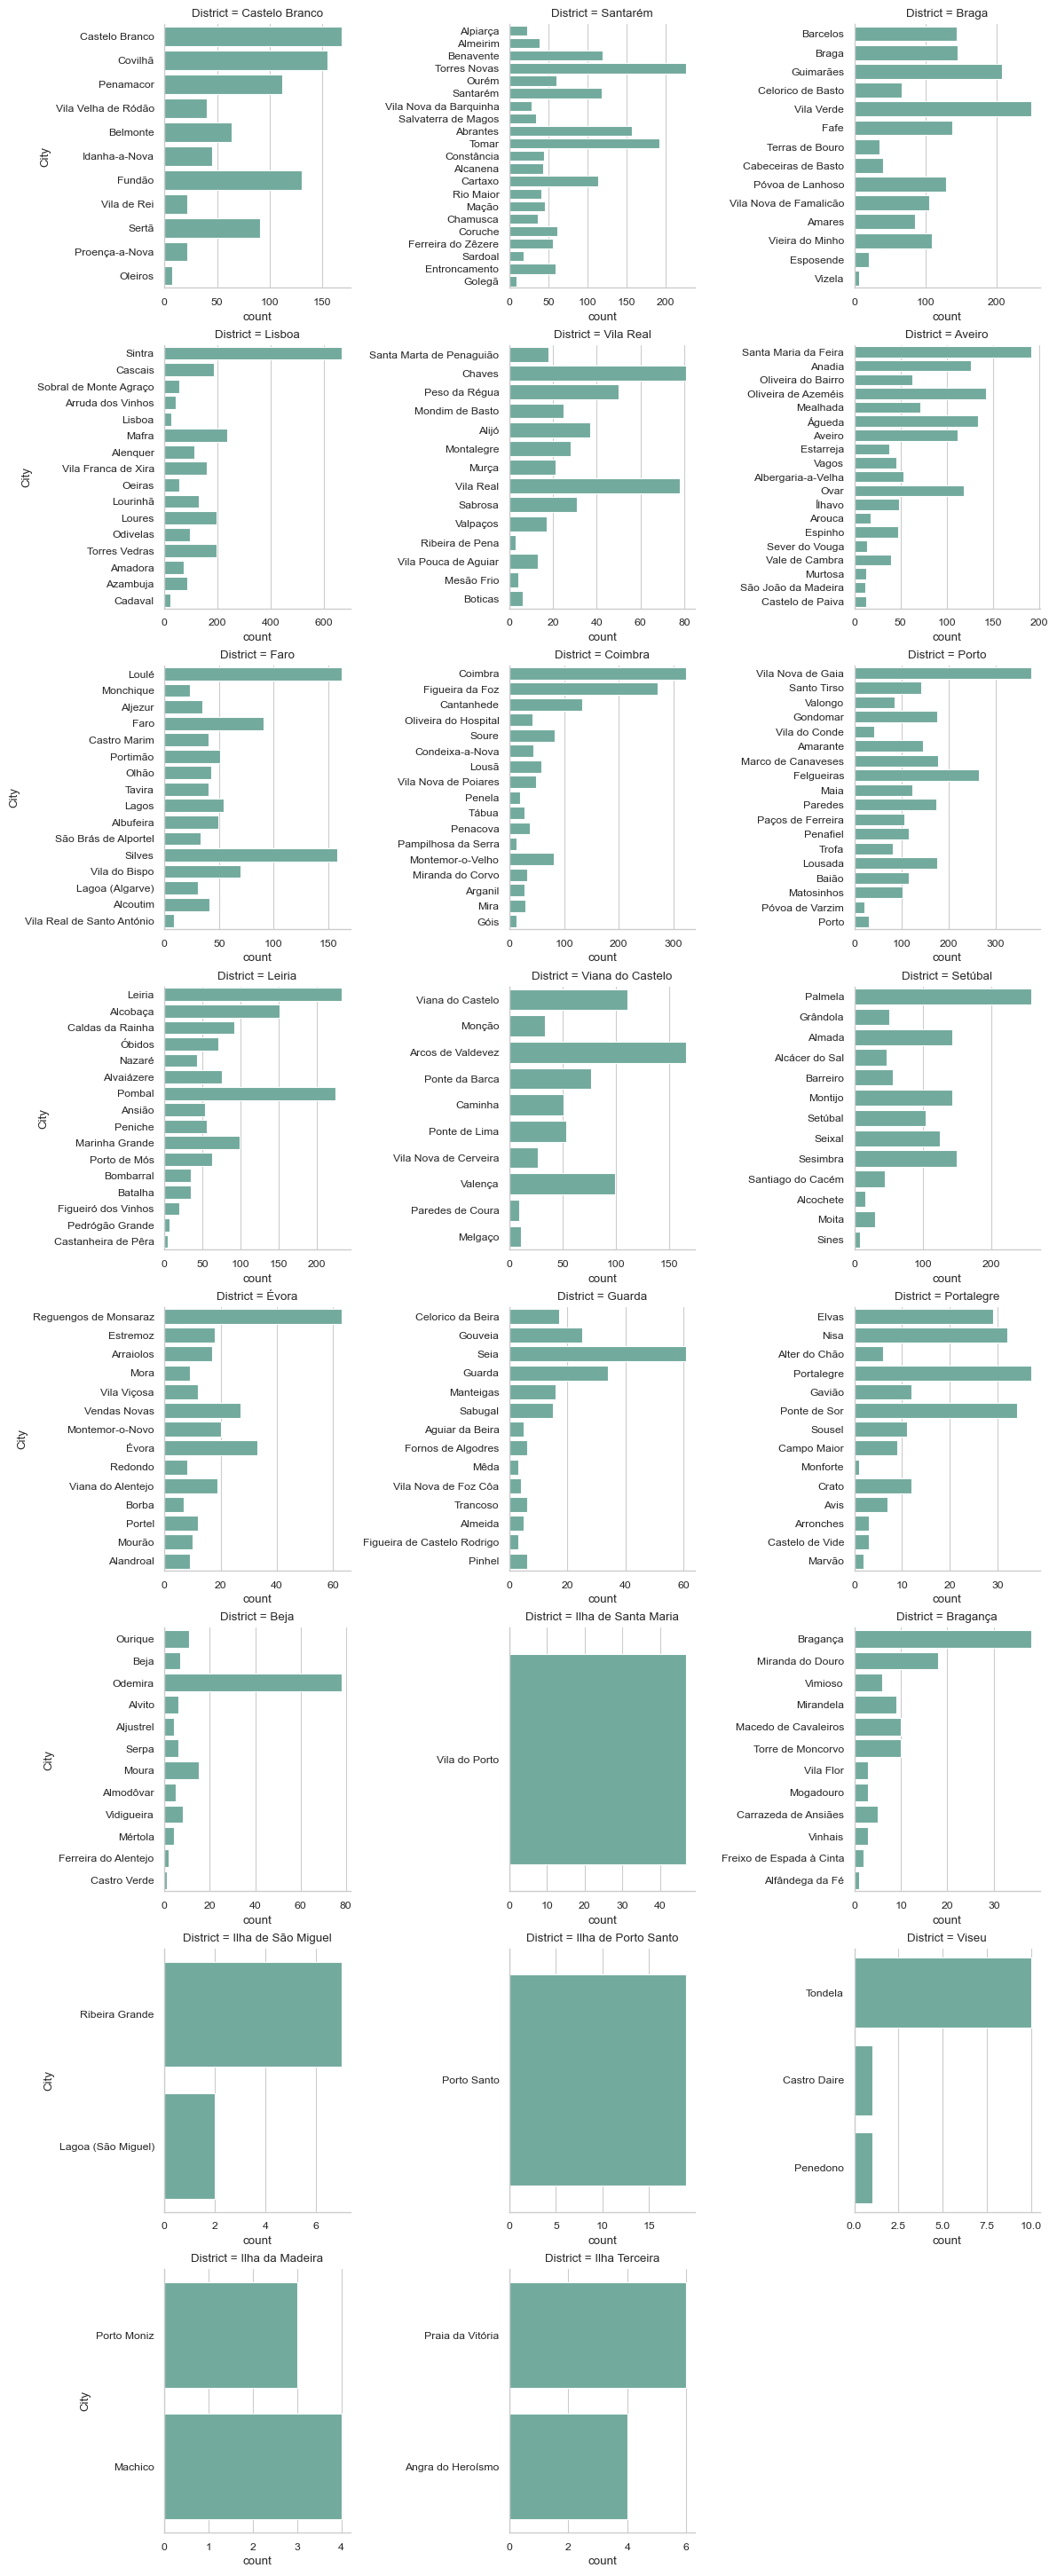

In [29]:
g = sns.FacetGrid(df, col="District", col_wrap=3, height=4, sharey=False, sharex=False)

g.map_dataframe(
    sns.countplot,
    y="City", 
    color='#69b3a2'
)

plt.subplots_adjust(top=0.9)
plt.show()



## Area impact on the price

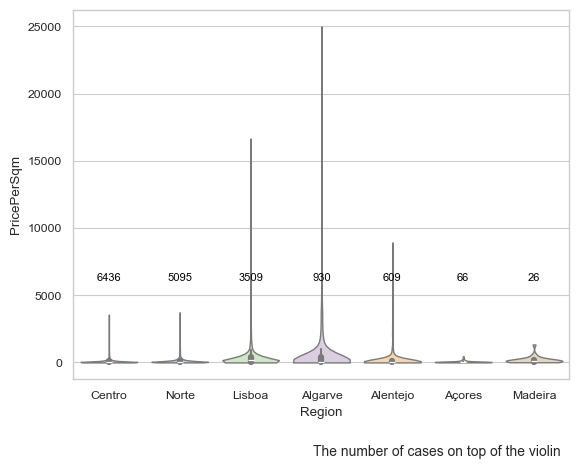

In [30]:

# Calculate medians and number of observations
medians = df.groupby(['Region'])['PricePerSqm'].median().values
nobs = df['Region'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
  
ax = sns.violinplot(x="Region", y="PricePerSqm", hue="Region", data=df, cut=0)
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
   ax.text(pos[tick], 6100, nobs[tick],
            horizontalalignment='center',
            size='small',
            color='black')

# Caption
plt.figtext(0.5, -0.05, "The number of cases on top of the violin", ha="left", fontsize=10)

plt.show()

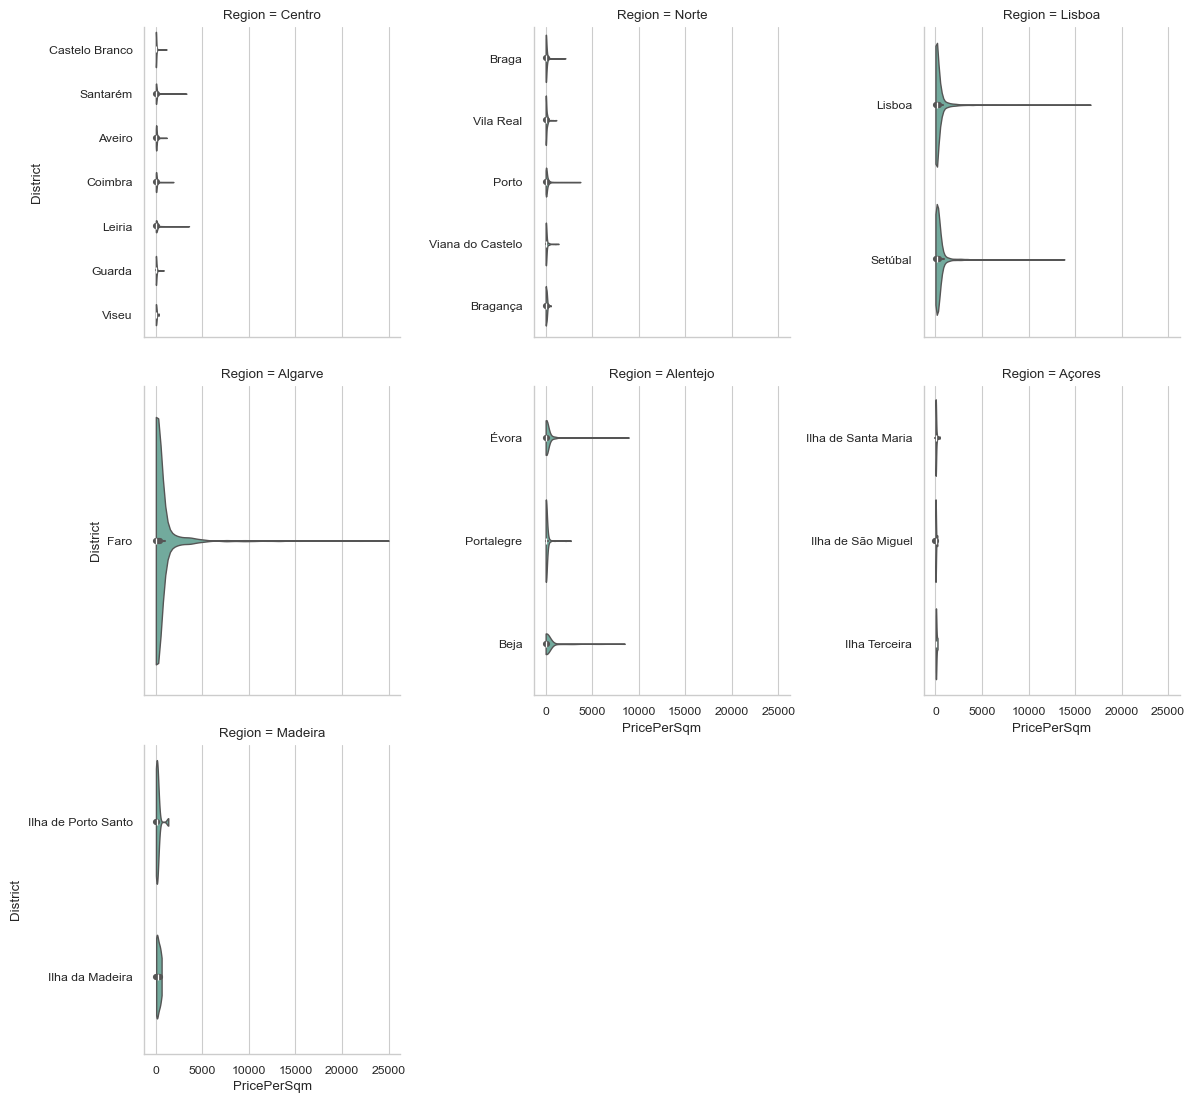

In [31]:
g = sns.FacetGrid(df, col="Region", col_wrap=3, height=4, sharey=False, sharex=True)

# Overlay datapoints
g.map_dataframe(
    sns.violinplot,
    x="PricePerSqm",
    y="District",
    color="#69b3a2",
    cut=0,
)

plt.subplots_adjust(top=0.9)
plt.show()

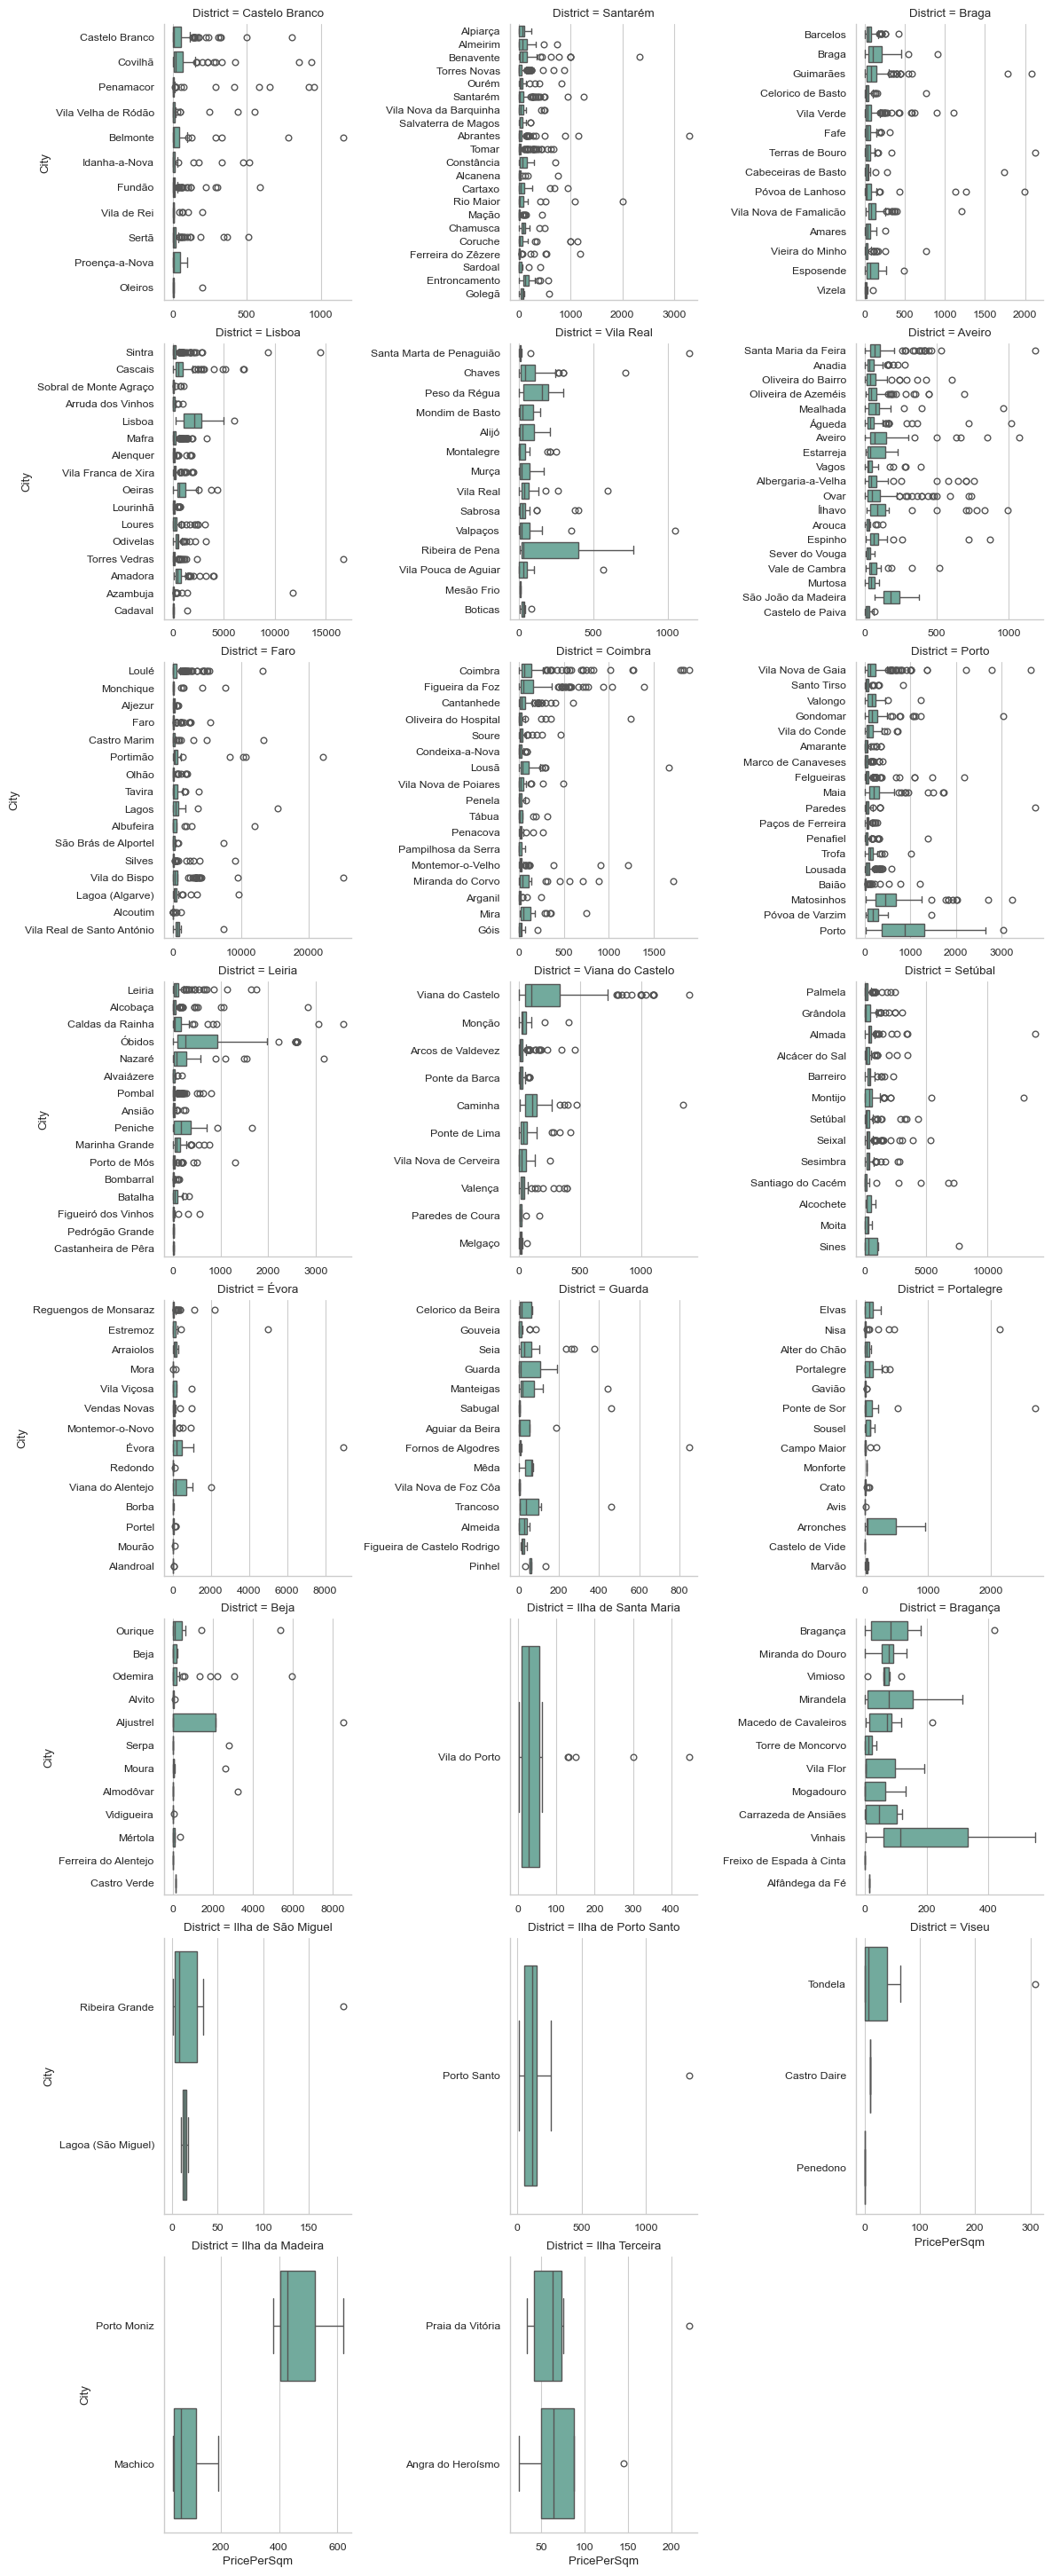

In [32]:
g = sns.FacetGrid(df, col="District", col_wrap=3, height=4, sharey=False, sharex=False)

# Overlay datapoints
g.map_dataframe(
    sns.boxplot,
    x="PricePerSqm",
    y="City",
    color="#69b3a2",
)

plt.subplots_adjust(top=0.9)
plt.show()